# Data Collation Preperation Stage

## 1 - CASDA RM Catalog

From astropy table - Gaensler et. al. 2010.

In [1]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

In [2]:
import numpy as np
from astropy.io import ascii

rm_data = ascii.read("../data_catalog/CASDA_RMs.ecsv")

sample_point = rm_data[0][0]

print(sample_point.galactic)

rm_data

<SkyCoord (Galactic): (l, b) in deg
    (316.68422229, 45.67884934)>


ra_dec_obj,faraday_depth_radmm,faraday_depth_err_radmm
"deg,deg",rad / m2,rad / m2
SkyCoord,float64,float64
"202.81578062778394,-16.126783338240127",5.279544100397107,0.8983063531113807
"202.13723753511783,-18.757444354301427",-3.681539816170432,1.7020005449491504
"204.53826899611454,-18.772884362037722",-3.449679401834384,1.8854362333546237
"205.10093689639805,-15.340573246612612",9.254418480973383,0.8814660181756719
"205.12571716967923,-15.779570732782277",-5.460015885116435,1.3001189432362714
"201.59252934889648,-19.929189688189737",-4.680838232310652,1.690857426456872
"202.651565689162,-15.139715342098357",27.270780440531915,1.085612322122986
"205.08387755755746,-16.126117633806565",1.98672771208837,1.3863145526991953


Our data is already in the desired format.

## 2 - GASS HI Emissions

From Westmeier et. al. 2018 - in the form of a fits file.

In [2]:
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt

hdu = fits.open("../data_catalog/hi4pi-hvc-nhi-ait.fits")
header = hdu[0].header
image = hdu[0].data

wcs = WCS(header)

from astropy.coordinates import SkyCoord
import astropy.units as u

galc = SkyCoord(l=180*u.deg,b=10*u.deg,frame='galactic')
print(galc)

sample_point = galc

#Figure out pixel coordinates of source from ra and decs
car = np.array([[sample_point.l.deg],[sample_point.b.deg]]).T #formatting: wcs_world2pix needs a 1x2 array for one object and two wcs axes
pix_coords_beam_map = WCS.wcs_world2pix(wcs,car,1)[0] #coords array, 1-based indexing for fits standard
print(pix_coords_beam_map)

print(image[int(pix_coords_beam_map[1])][int(pix_coords_beam_map[0])])

<SkyCoord (Galactic): (l, b) in deg
    (180., 10.)>
[1946.00000028 1093.84774932]
19.209148


In [3]:
from wcs import image_transform as it
import math

HIcol = []
for row in range(len(rm_data)):
    h1 = it.get_flux_at_point(hdu[0], rm_data[row][0])
    if math.isnan(h1):
        HIcol.append(0)
    else:
        HIcol.append(h1)
    print(row)
rm_data.add_column(HIcol, index=1, name="HI flux")
rm_data

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

ra_dec_obj,HI flux,faraday_depth_radmm,faraday_depth_err_radmm
"deg,deg",,rad / m2,rad / m2
SkyCoord,float64,float64,float64
"202.81578062778394,-16.126783338240127",0.0,5.279544100397107,0.8983063531113807
"202.13723753511783,-18.757444354301427",0.0,-3.681539816170432,1.7020005449491504
"204.53826899611454,-18.772884362037722",0.0,-3.449679401834384,1.8854362333546237
"205.10093689639805,-15.340573246612612",0.0,9.254418480973383,0.8814660181756719
"205.12571716967923,-15.779570732782277",0.0,-5.460015885116435,1.3001189432362714
"201.59252934889648,-19.929189688189737",0.0,-4.680838232310652,1.690857426456872
"202.651565689162,-15.139715342098357",0.0,27.270780440531915,1.085612322122986
"205.08387755755746,-16.126117633806565",0.0,1.98672771208837,1.3863145526991953


## 3 - GASS HVC locations

From Moss et. al. 2013 - in the form of a VOTable

In [2]:
"""
Quick-and-dirty HVC
"""
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS
from astropy.table import Table
import astropy.units as u
from astropy.io.votable import parse_single_table
import subprocess
import matplotlib.pyplot as plt
import numpy as np

"""
This script simply consists of steps to cobbled together. It is not to just be run start to finish
"""

"""
Filter Moss+2013 table to objects of a certain area
"""

def format_sexagesimal(coord):
    ra, dec = coord.split()[:3], coord.split()[3:]
    ra_formatted = ':'.join(ra)
    dec_formatted = f"{dec[0]}:{dec[1]}:{dec[2]}"
    return f"{ra_formatted} {dec_formatted}"

# Read the VOTable file
table = parse_single_table('../data_catalog/vizier_Moss2013_HVCs.vot').to_table()

#table

# Mask to decent sized area
mask = (table['Area']>1) & (table['Area']<np.pi)

table_big_HVCs = table[mask]

#table_big_HVCs

# Assuming the coordinates are in columns 'ra' and 'dec', adjust as needed
ra_dec = [f"{row['RAJ2000']} {row['DEJ2000']}" for row in table_big_HVCs]
ra_dec = [format_sexagesimal(f"{row['RAJ2000']} {row['DEJ2000']}") for row in table_big_HVCs]

ra_dec = SkyCoord(ra_dec,frame='fk5',unit=('hour','deg')).icrs

# Data is now in desired structure
table.add_column(ra_dec, index=1, name="SkyCoord")

table.info

#print(ICRS(ra=table["RAJ2000"][0], dec=table["DECJ2000"][0]))

ValueError: Inconsistent data column lengths

## 4 - H-alpha measurements

Finkbeiner et. al. 2003

In the form of a FITS file

In [45]:
from collation import file_find as ff
from collation import collator as cl
import matplotlib.pyplot as plt
import numpy as np

img, err = ff.get_H_alpha()
RMs = ff.get_RMs()

#plt.imshow(np.log(img.data))
#plt.show()

#plt.imshow(np.log(err.data))
#plt.show()

err.header

RMs = cl.collate(RMs, img, err)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [4]:
RMs

ra_dec_obj,H-alpha flux [Error],H-alpha flux,faraday_depth_radmm,faraday_depth_err_radmm
"deg,deg",R,R,rad / m2,rad / m2
SkyCoord,float32,float32,float64,float64
"202.81578062778394,-16.126783338240127",0.73828125,4.9140625,5.279544100397107,0.8983063531113807
"202.13723753511783,-18.757444354301427",0.33007812,0.91308594,-3.681539816170432,1.7020005449491504
"204.53826899611454,-18.772884362037722",0.43945312,1.9750977,-3.449679401834384,1.8854362333546237
"205.10093689639805,-15.340573246612612",0.69921875,4.513672,9.254418480973383,0.8814660181756719
"205.12571716967923,-15.779570732782277",0.6796875,4.310547,-5.460015885116435,1.3001189432362714
"201.59252934889648,-19.929189688189737",0.33789062,0.9934082,-4.680838232310652,1.690857426456872
"202.651565689162,-15.139715342098357",0.6796875,4.3339844,27.270780440531915,1.085612322122986
"205.08387755755746,-16.126117633806565",0.48632812,2.3554688,1.98672771208837,1.3863145526991953


## 5 - Interpolated full collated data conversion

Hutschenreuter et. al. 2022;  Van Eck et. al. (in prep.)

Healpy is not supported on windows!

In [54]:
#import healpy as hp
import h5py
import inspect
from astropy.io import fits
import reproject as repo
import numpy as np

f = h5py.File('../data_catalog/faraday_sky_w_ff_Hutschenreuter_2020.hdf5', 'r')

#imshow values, plot specific locations of interest. 
healpix_ringorder_N128_mean = f['faraday sky']['mean']
healpix_ringorder_N128_std = f['faraday sky']['std']

target_header = fits.Header.fromstring("""
SIMPLE  =                    T /     
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                 8640 /                                                
NAXIS2  =                 4320 /                                                
DATE    = '2024-04-12'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
CTYPE1  = 'GLON-CAR'           /                                                
CRPIX1  =              4320.50 /                                                
CRVAL1  =              0.00000 /                                                
CTYPE2  = 'GLAT-CAR'           /                                                
CRPIX2  =              2160.50 /                                                
CRVAL2  =              0.00000 /                                                
CD1_1   =     -0.0416666666667 /                                                
CD1_2   =        0.00000000000 /                                                
CD2_1   =        0.00000000000 /                                                
CD2_2   =      0.0416666666667 /                                                
LONPOLE =                  180 /                                                
PROJP1  =                    0 /                                                
PROJP2  =                    0 /                                                
EQUINOX =              2000.00 /                                                
BUNIT   = 'R       '           /                                                
VERSION = '1.1     '           /   
""", sep='\n')

#print(np.array(healpix_ringorder_N128_mean))

array, footprint = repo.reproject_from_healpix((np.array(healpix_ringorder_N128_mean), 'galactic'), target_header, nested=False)

hdu = fits.PrimaryHDU(array, target_header)
hdu.writeto("../data_catalog/Hutschenreuter_2020_faraday_sky_wff_mean.fits")

#wcs = WCS(target_header)
#ax = plt.subplot(1,1,1, projection=wcs, frame_class=EllipticalFrame)
#ax.imshow(array, vmin=0, vmax=1.e-8)
#ax.coords.grid(color='white')
#ax.coords['ra'].set_ticklabel(color='white')

the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]


In [2]:
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.visualization.wcsaxes.frame import EllipticalFrame

plt.imshow(array)
plt.show()

from collation import file_find as ff
from collation import collator as cl
import matplotlib.pyplot as plt
import numpy as np

img, err = ff.get_H_alpha()
RMs = ff.get_RMs()

plt.imshow(np.sqrt(img.data))
plt.show()

NameError: name 'array' is not defined

### Get k-space

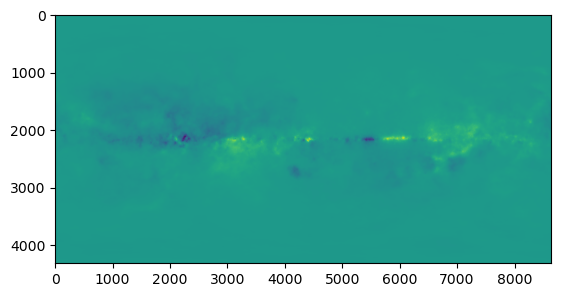

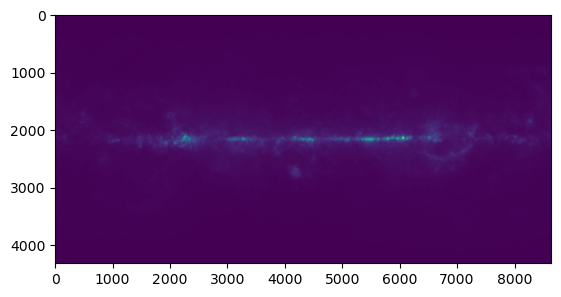

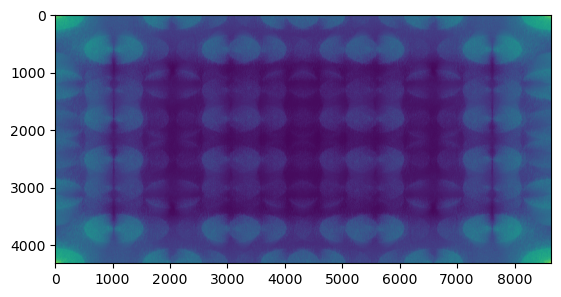

In [9]:
from collation import file_find as ff
from matplotlib import pyplot as plt
import numpy as np

interpolation = ff.get_interpolation(calculate_interpolation=False)

#import scipy.fft
#import numpy as np

#ft = scipy.fft.fft2(interpolation)

#new_img = scipy.fft.ifft2(ft)

plt.imshow(interpolation[0].data)
plt.show()

plt.imshow(interpolation[1].data)
plt.show()

plt.imshow(np.log(np.abs(interpolation[2].real)+1))
plt.show()

# Putting it all together

In [1]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator

collated_data = collator.data_whole_sky(False, save_data="../data_processed/proc_rms")
print(collated_data)

Gathering data ...
Getting H-alpha emission
Collating RMs


the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]


Getting HVC location data
Getting HI emission
Interpolating


Saving processed RM table
(<Table length=34493>
              ra_dec_obj               ... faraday_depth_err_radmm
               deg,deg                 ...         rad / m2       
               SkyCoord                ...         float64        
-------------------------------------- ... -----------------------
202.81578062778394,-16.126783338240127 ...      0.8983063531113807
202.13723753511783,-18.757444354301427 ...      1.7020005449491504
204.53826899611454,-18.772884362037722 ...      1.8854362333546237
205.10093689639805,-15.340573246612612 ...      0.8814660181756719
205.12571716967923,-15.779570732782277 ...      1.3001189432362714
201.59252934889648,-19.929189688189737 ...       1.690857426456872
  202.651565689162,-15.139715342098357 ...       1.085612322122986
205.08387755755746,-16.126117633806565 ...      1.3863145526991953
  202.7168426301623,-16.71384812526132 ...      0.9637416779836789
                                   ... ...                     ...
  296.95547532

<Table length=34493>
          name           dtype    unit              description             class  
----------------------- ------- -------- --------------------------------- --------
             ra_dec_obj  object  deg,deg                                   SkyCoord
   H-alpha flux [Error] float32        R                                     Column
           H-alpha flux float32        R                                     Column
    faraday_depth_radmm float64 rad / m2          Faraday depth in rad/m^2   Column
faraday_depth_err_radmm float64 rad / m2 Error in Faraday depth in rad/m^2   Column

<Table length=151>
  name    dtype    unit   format                                    description                                       class    
-------- ------- ------- ------- --------------------------------------------------------------------------------- ------------
    Name   str15                                                                  HVC/AVC name GLLL.l+BB.b+VVV (1) 

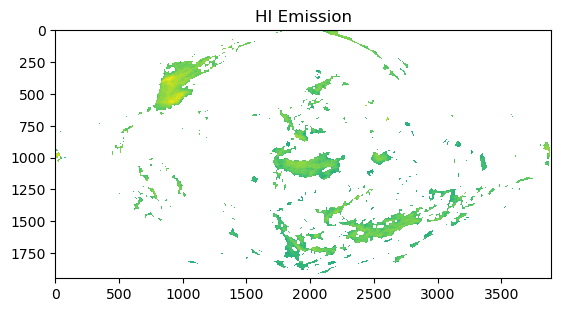

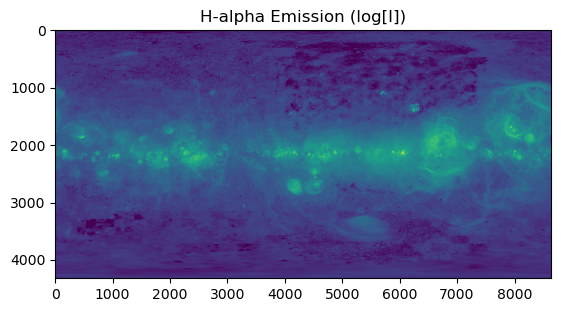

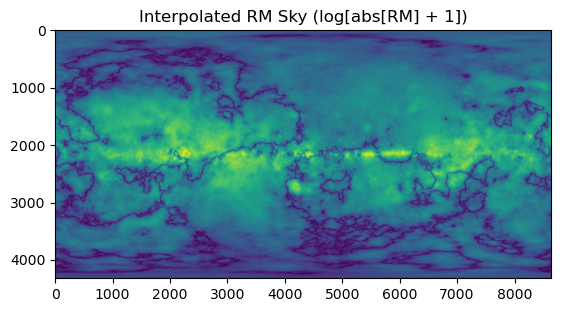

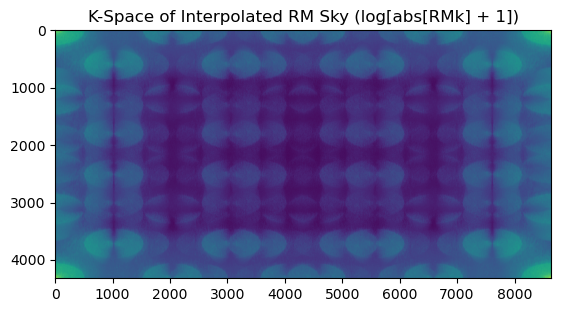

In [13]:
from matplotlib import pyplot as plt
import numpy as np

print(collated_data[0].info)
print(collated_data[1].info)
plt.imshow(collated_data[2].data)
plt.title("HI Emission")
plt.show()
plt.imshow(np.log(collated_data[3].data))
plt.title("H-alpha Emission (log[I])")
plt.show()
plt.imshow(np.log(np.abs(collated_data[4][0].data)+1))
plt.title("Interpolated RM Sky (log[abs[RM] + 1])")
plt.show()
plt.imshow(np.log(np.abs(collated_data[4][2].data)+1))
plt.title("K-Space of Interpolated RM Sky (log[abs[RMk] + 1])")
plt.show()

In [3]:
collated_data[1]

Name,SkyCoord,RAJ2000,DEJ2000,VLSR,e_VLSR,VGSR,Vdev,FWHM,TbFit,NH,e_NH,Area,dx,dy,Flag,HI,WW91,Simbad,recno,Cat
,"deg,deg",,,km / s,km / s,km / s,km / s,km / s,K,1 / cm2,1 / cm2,deg2,deg,deg,,,,,,
str15,SkyCoord,str11,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,str26,str22,str6,int32,str4
G001.2-15.4-185,"283.26028447412233,-34.88611707131728",18 53 02.47,-34 53 10,-185.8,1.0,-181.2,-138.3,21.4,1.36,6e+19,2e+18,1.1,1.0,1.3,H1,CHVC 001.2-15.5-186,"GCN_GCN,N",Simbad,8,GHVC
G002.1-43.1-126,"317.81553732294526,-40.06667225172776",21 11 15.73,-40 04 00,-126.2,1.0,-120.0,-88.7,12.4,2.29,7e+19,1e+18,2.0,1.9,3.1,"T,H5",HVC 002.3-43.1-118,N,Simbad,21,GHVC
G003.9-36.8-137,"309.8759115687047,-38.218616973946475",20 39 30.22,-38 13 07,-137.2,1.0,-125.1,-99.7,24.1,0.90,4e+19,2e+18,1.9,4.3,2.4,H3,HVC 004.1-36.3-130,N,Simbad,38,GHVC
G005.2-33.0-128,"305.341411145527,-36.490005971303596",20 21 21.94,-36 29 24,-128.5,1.5,-111.5,-91.0,28.5,0.53,3e+19,3e+18,1.1,3.1,1.8,H2,HVC 005.6-32.9-120,N,Simbad,47,GHVC
G005.9-32.4-110,"304.7617860811444,-35.80695042693013",20 19 02.83,-35 48 25,-110.6,2.7,-91.3,-73.1,31.2,0.31,4e+18,3e+18,2.9,2.6,3.5,H1,HVC 006.4-31.5-088,N,Simbad,60,GHVC
G011.4-67.7-157,"347.9989551483094,-33.05028139969578",23 11 59.75,-33 03 01,-157.6,1.0,-141.0,-125.1,24.7,0.80,4e+19,2e+18,1.2,2.5,0.9,"T,H1",CHVC 011.6-67.7-155,"N,MS_MS",Simbad,110,GHVC
G015.7-14.6-219,"288.728035058528,-21.75250604671004",19 14 54.73,-21 45 09,-219.6,1.7,-162.0,-177.1,18.9,0.30,1e+19,2e+18,1.3,3.2,2.4,H2,HVC 015.9-14.3-222,"GCN_GCN,EN,N",Simbad,144,GHVC
G020.0-18.3-242,"294.0889102874738,-19.36083941143664",19 36 21.34,-19 21 39,-242.1,1.0,-170.5,-199.6,7.8,0.54,1e+19,8e+17,1.1,1.8,1.5,H1,HVC 020.1-18.1-242,"GCN_GCN,EN",Simbad,176,GHVC
